In [1]:
import sys
import os
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from pycgp_finalclass.CGP import CGP
from pycgp_finalclass.Config import CGPConfig
from pycgp_finalclass.ES import ES
from pycgp_finalclass.Evaluator import EvaluatorSin, Binary_Classifier
from pycgp_finalclass.Node import Node
from pycgp_finalclass.Mutation import Proba_Mutation, Golden_mutation
from pycgp_finalclass.Function import Func
from pycgp_finalclass.Function_library import *
from pycgp_finalclass.Genome import CGPGenome


In [ ]:
def build_funcLib(): #Define the function used
    return [Func(f_sum, 'sum', 2, 0),
            Func(f_aminus, 'aminus', 2, 0),
            Func(f_mult, 'mult', 2, 0),
            Func(f_exp, 'exp', 2, 0),
            Func(f_abs, 'abs', 1, 0),
            Func(f_sqrt, 'sqrt', 1, 0),
            Func(f_sqrtxy, 'sqrtxy', 2, 0),
            Func(f_squared, 'squared', 1, 0),
            Func(f_pow, 'pow', 2, 0),
            Func(f_one, 'one', 0, 0),
            Func(f_zero, 'zero', 0, 0),
            #Func(f_const, 'const', 0, 1),
            Func(f_inv, 'inv', 1, 0),
            Func(f_gt, 'gt', 2, 0),
            #Func(f_asin, 'asin', 1, 0),
            #Func(f_acos, 'acos', 1, 0),
            #Func(f_atan, 'atan', 1, 0),
            #Func(f_sin, 'sin', 1, 0),
            Func(f_min, 'min', 2, 0),
            Func(f_max, 'max', 2, 0),
            Func(f_round, 'round', 1, 0),
            Func(f_floor, 'floor', 1, 0),
            Func(f_ceil, 'ceil', 1, 0)
            ]
functions = build_funcLib()

In [ ]:
#In development
""" from scipy.io import arff
import pandas as pd

# Load the .arff file
data, meta = arff.loadarff("datasets/Colon_fixed.arff")

# Convert to pandas DataFrame
df = pd.DataFrame(data)

# If string columns are returned as bytes, decode them
for col in df.select_dtypes([object]).columns:
    df[col] = df[col].str.decode('utf-8')

# Replace "relapse" with 1 and "non-relapse" with 0 in the 'Class' column
df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


from sklearn.preprocessing import MinMaxScaler

# Séparation des features et de la cible
X = df.drop('class', axis=1)  # Features
y = df['class']               # Target

# Conversion des colonnes en float
X = X.astype(float)

# Standardisation avec MinMaxScaler dans l'intervalle [-1, 1]
scaler = MinMaxScaler(feature_range=(-1, 1))
X = scaler.fit_transform(X)

evaluator2 = Binary_Classifier(X, y) """

C:\Users\pauls\AppData\Local\Temp\ipykernel_10888\2853248603.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'Tumor': 1, 'Normal': 0})


In [ ]:




#Initialise config + Evaluator + mutation 
CGP_config = CGPConfig(num_inputs=1, num_nodes=30, num_outputs=1, input_node_chance=0.4, const_min=-1, const_max=1, function_set=functions)
#For evaluatorsin num_inputs = 1

#mutationcgp_proba = Proba_Mutation(CGP_config, number_mutations=10, input_node_mutation_rate=0.2, output_node_mutation_rate=0.1, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1)
mutationcgp_golden = Golden_mutation(CGP_config,input_node_mutation_rate=0.2, function_mutation_rate=0.4, input_mutation_rate=0.5, const_mutation_rate=0.1,output_node_mutation_rate=0.1)

evaluator1 = EvaluatorSin()

#Test purpose
genome_cgp = CGPGenome.create_genome(CGP_config)
active_nodes = genome_cgp.get_active_nodes()
print("Active nodes:", active_nodes)



Active nodes: [<pycgp_finalclass.Node.Node object at 0x000001D61500B860>, <pycgp_finalclass.Node.Node object at 0x000001D616063B90>, <pycgp_finalclass.Node.Node object at 0x000001D616063DD0>]


In [ ]:
#Initialise the ES and run the evolution
ES_cgp = ES(evaluator1, mu=1, lam=4,genome_factory=lambda: CGPGenome.create_genome(CGP_config),mutation = mutationcgp_golden)
best_genome = ES_cgp.evolve(n_generations=10000, early_stopping=1000)

print(best_genome.to_function_string())



Early stopping at generation 1043 (no improvement for 1000 generations).

Best fitness achieved: 0.9893
n1 = squared(x0)
n2 = pow(n1, n1)
n3 = sqrtxy(n2, n1)
n4 = min(n3, n3)
n5 = sqrtxy(n2, x0)
n6 = sqrtxy(n4, n4)
n7 = aminus(n6, n3)
n8 = zero()
n9 = pow(n3, n5)
n10 = round(n3)
n11 = exp(n7, n6)
n12 = min(n8, x0)
n13 = exp(n11, x0)
n14 = one()
n15 = gt(n13, n9)
n16 = inv(n8)
n17 = squared(n9)
n18 = floor(n13)
n19 = gt(n15, n9)
n20 = round(n7)
n21 = mult(n6, n9)
n22 = min(x0, n2)
n23 = exp(x0, n19)
n24 = min(n23, n23)
n25 = min(n14, n9)
n26 = gt(n17, x0)
n27 = ceil(n20)
n28 = aminus(n2, n26)
n29 = exp(n8, n7)
n30 = sqrt(n6)
Output: n22

Unrolled output expression:
min(x0, pow(squared(x0), squared(x0)))
n1 = squared(x0)
n2 = pow(n1, n1)
n3 = sqrtxy(n2, n1)
n4 = min(n3, n3)
n5 = sqrtxy(n2, x0)
n6 = sqrtxy(n4, n4)
n7 = aminus(n6, n3)
n8 = zero()
n9 = pow(n3, n5)
n10 = round(n3)
n11 = exp(n7, n6)
n12 = min(n8, x0)
n13 = exp(n11, x0)
n14 = one()
n15 = gt(n13, n9)
n16 = inv(n8)
n17 = squared

n1 = squared(x0)
n2 = pow(n1, n1)
n3 = sqrtxy(n2, n1)
n4 = min(n3, n3)
n5 = sqrtxy(n2, x0)
n6 = sqrtxy(n4, n4)
n7 = aminus(n6, n3)
n8 = zero()
n9 = pow(n3, n5)
n10 = round(n3)
n11 = exp(n7, n6)
n12 = min(n8, x0)
n13 = exp(n11, x0)
n14 = one()
n15 = gt(n13, n9)
n16 = inv(n8)
n17 = squared(n9)
n18 = floor(n13)
n19 = gt(n15, n9)
n20 = round(n7)
n21 = mult(n6, n9)
n22 = min(x0, n2)
n23 = exp(x0, n19)
n24 = min(n23, n23)
n25 = min(n14, n9)
n26 = gt(n17, x0)
n27 = ceil(n20)
n28 = aminus(n2, n26)
n29 = exp(n8, n7)
n30 = sqrt(n6)
Output: n22

Unrolled output expression:
min(x0, pow(squared(x0), squared(x0)))


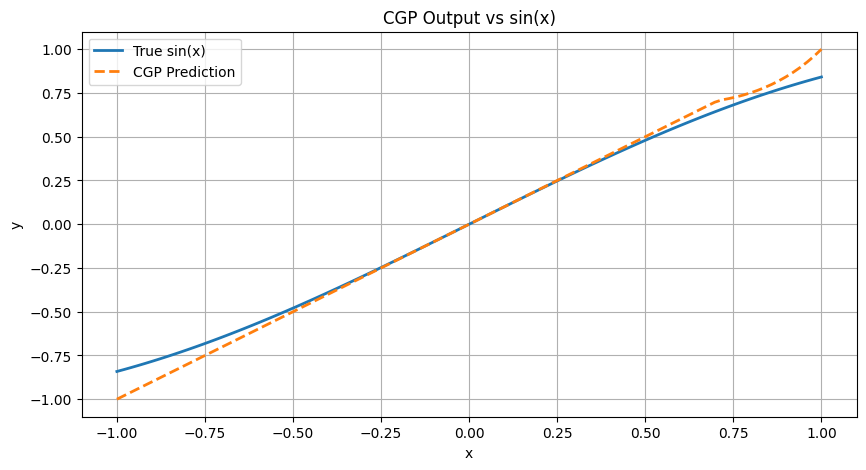

Fitness of best genome: 0.9892653590575242


In [ ]:
#See if the output fit the sin function

import matplotlib.pyplot as plt

def plot_sin_vs_prediction(evaluator, genome):
    inputs = evaluator.inputs
    targets = evaluator.targets

    predictions = [genome.get_value([x])[0] for x in inputs]

    plt.figure(figsize=(10, 5))
    plt.plot(inputs, targets, label='True sin(x)', linewidth=2)
    plt.plot(inputs, predictions, label='CGP Prediction', linestyle='--', linewidth=2)
    plt.title('CGP Output vs sin(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()
print(best_genome.to_function_string())
plot_sin_vs_prediction(evaluator1, best_genome)
print(f"Fitness of best genome: {evaluator1.evaluate(best_genome, generation=0)}")
